<a href="https://colab.research.google.com/github/Igorvl/Projects/blob/master/%D0%A0%D0%B5%D0%BA%D1%83%D1%80%D1%80%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B5_%D0%B8_%D0%BE%D0%B4%D0%BD%D0%BE%D0%BC%D0%B5%D1%80%D0%BD%D1%8B%D0%B5_%D1%81%D0%B2%D0%B5%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_%7C_Lite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Подготовка

In [1]:
# Работа с массивами данных
import numpy as np 

import pandas as pd

# Функции-утилиты для работы с категориальными данными
from tensorflow.keras import utils

# Класс для конструирования последовательной модели нейронной сети
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Bidirectional, Conv1D, MaxPooling1D, GlobalMaxPooling1D

# Токенизатор для преобразование текстов в последовательности
from tensorflow.keras.preprocessing.text import Tokenizer

# Рисование схемы модели
from tensorflow.keras.utils import plot_model

# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Загрузка датасетов из облака google
import gdown

# Функции операционной системы
import os

# Работа со временем
import time

# Регулярные выражения
import re

# Отрисовка графиков
import matplotlib.pyplot as plt

# Вывод объектов в ячейке colab
from IPython.display import display

%matplotlib inline

In [2]:
# Загрузим датасет из облака
gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l7/writers.zip', None, quiet=True)

'writers.zip'

In [3]:
# Распакуем архив в папку writers
!unzip -o writers.zip -d writers/


Archive:  writers.zip
  inflating: writers/(Клиффорд_Саймак) Обучающая_5 вместе.txt  
  inflating: writers/(Клиффорд_Саймак) Тестовая_2 вместе.txt  
  inflating: writers/(Макс Фрай) Обучающая_5 вместе.txt  
  inflating: writers/(Макс Фрай) Тестовая_2 вместе.txt  
  inflating: writers/(О. Генри) Обучающая_50 вместе.txt  
  inflating: writers/(О. Генри) Тестовая_20 вместе.txt  
  inflating: writers/(Рэй Брэдберри) Обучающая_22 вместе.txt  
  inflating: writers/(Рэй Брэдберри) Тестовая_8 вместе.txt  
  inflating: writers/(Стругацкие) Обучающая_5 вместе.txt  
  inflating: writers/(Стругацкие) Тестовая_2 вместе.txt  
  inflating: writers/(Булгаков) Обучающая_5 вместе.txt  
  inflating: writers/(Булгаков) Тестовая_2 вместе.txt  


In [4]:
# Настройка констант для загрузки данных
FILE_DIR  = 'writers'                     # Папка с текстовыми файлами
SIG_TRAIN = 'обучающая'                   # Признак обучающей выборки в имени файла
SIG_TEST  = 'тестовая'                    # Признак тестовой выборки в имени файла

In [5]:
CLASS_LIST = []  # Список классов 
text_train = []  # Список для оучающей выборки
text_test = []   # Список для тестовой выборки

# Получение списка файлов в папке
file_list = os.listdir(FILE_DIR)

for file_name in file_list:
    # Имя класса и типа выборки из имени файла
    m = re.match('\((.+)\) (\S+)_', file_name)
    if m:

        # Имя класса
        class_name = m[1]

        # Имя выборки
        subset_name = m[2].lower()

        # Тип выборки 
        is_train = SIG_TRAIN in subset_name
        is_test = SIG_TEST in subset_name

        # Если тип выборки обучающая либо тестовая - файл обрабатываем
        if is_train or is_test:

            # Добавляем новый класс, если его еще нет в списке
            if class_name not in CLASS_LIST:
                print(f'Добавление класса "{class_name}"')
                CLASS_LIST.append(class_name)

                # Инициализируем соответствующих классу строки текста
                text_train.append('')
                text_test.append('')

            # Найдем индекс класса для добавления содержимого файла в выборку
            cls = CLASS_LIST.index(class_name)
            print(f'Добавление файла "{file_name}" в класс "{CLASS_LIST[cls]}", {subset_name} выборка.')

            # Откроем файл на чтение  
            with open(f'{FILE_DIR}/{file_name}', 'r') as f:  

                # Загрузим содержимого файла в строку
                text = f.read()
            # Определим выборку, куда будет добавлено содержимое
            subset = text_train if is_train else text_test

            # Добавим текста к соответствующей выборке класса. Концы строк заменяются на пробел
            subset[cls] += ' ' + text.replace('\n', ' ')

Добавление класса "Булгаков"
Добавление файла "(Булгаков) Тестовая_2 вместе.txt" в класс "Булгаков", тестовая выборка.
Добавление класса "Стругацкие"
Добавление файла "(Стругацкие) Обучающая_5 вместе.txt" в класс "Стругацкие", обучающая выборка.
Добавление класса "О. Генри"
Добавление файла "(О. Генри) Обучающая_50 вместе.txt" в класс "О. Генри", обучающая выборка.
Добавление класса "Клиффорд_Саймак"
Добавление файла "(Клиффорд_Саймак) Обучающая_5 вместе.txt" в класс "Клиффорд_Саймак", обучающая выборка.
Добавление класса "Рэй Брэдберри"
Добавление файла "(Рэй Брэдберри) Обучающая_22 вместе.txt" в класс "Рэй Брэдберри", обучающая выборка.
Добавление файла "(О. Генри) Тестовая_20 вместе.txt" в класс "О. Генри", тестовая выборка.
Добавление файла "(Клиффорд_Саймак) Тестовая_2 вместе.txt" в класс "Клиффорд_Саймак", тестовая выборка.
Добавление файла "(Стругацкие) Тестовая_2 вместе.txt" в класс "Стругацкие", тестовая выборка.
Добавление класса "Макс Фрай"
Добавление файла "(Макс Фрай) Тест

In [6]:
re.match('\((.+)\) (\S+)_', file_name)
file_name

'(Рэй Брэдберри) Тестовая_8 вместе.txt'

In [7]:
# Определим количество классов
CLASS_COUNT = len(CLASS_LIST)

In [8]:
# Выведем прочитанные классы текстов
print(CLASS_LIST)

['Булгаков', 'Стругацкие', 'О. Генри', 'Клиффорд_Саймак', 'Рэй Брэдберри', 'Макс Фрай']


In [9]:
# Посчитаем количество текстов в обучающей выборке
print(len(text_train))

6


In [10]:
# Проверим загрузки: выведем начальные отрывки из каждого класса

for cls in range(CLASS_COUNT):                   # Запустим цикл по числу классов
    print(f'Класс: {CLASS_LIST[cls]}')           # Выведем имя класса
    print(f'  train: {text_train[cls][:200]}')   # Выведем фрагмент обучающей выборки
    print(f'  test : {text_test[cls][:200]}')    # Выведем фрагмент тестовой выборки
    print()

Класс: Клиффорд_Саймак
  train:  ﻿Всё живое...     Когда я выехал из нашего городишка и повернул на шоссе, позади оказался грузовик. Этакая тяжелая громадина с прицепом, и неслась она во весь дух. Шоссе здесь срезает угол городка, и
  test :  ﻿Зачарованное паломничество    1  Гоблин со стропил следил за прячущимся монахом, который шпионил за ученым. Гоблин ненавидел монаха и имел для этого все основания. Монах никого не ненавидел и не люб

Класс: О. Генри
  train:  «Лиса-на-рассвете»   Коралио нежился в полуденном зное, как томная красавица в сурово хранимом гареме. Город лежал у самого моря на полоске наносной земли. Он казался брильянтиком, вкрапленным в ярко
  test :  ﻿Багдадская птица   Без всякого сомнения, дух и гений калифа Гаруна аль-Рашида осенил маркграфа Августа-Михаила фон Паульсена Квигга.  Ресторан Квигга находится на Четвертой авеню — на улице, которую

Класс: Макс Фрай
  train:  ﻿Власть несбывшегося   – С тех пор как меня угораздило побывать в этой грешной Черхавле, мне

In [11]:
# Контекстный менеджер для измерения времени операций
# Операция обертывается менеджером с помощью оператора with

class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        print('Время обработки: {:.2f} с'.format(time.time() - self.t))

## Решение

1. Из "Рекуррентные и одномерные сверточные нейронные сети" выберите лучшую сеть, либо создайте свою. 
2. Подготовьте датасет с параметрами `VOCAB_SIZE=20'000`, `WIN_SIZE=1000`, `WIN_HOP=100`, и обучите выбранную сеть. Параметры обучения можно взять из практики. Для  всех обучаемых сетей в данной работе они должны быть одни и теже.
3. Поменяйте размер словаря tokenaizera (`VOCAB_SIZE`) на `5000`, `10000`, `40000`.  Пересоздайте датасеты, при этом оставьте `WIN_SIZE=1000`, `WIN_HOP=100`.
Обучите выбранную нейронку на этих датасетах.  Сделайте выводы об  изменении  точности распознавания авторов текстов. Результаты сведите в таблицу

In [ ]:
# ваше решение

In [13]:
# Разбиение последовательности на отрезки скользящим окном
def split_sequence(sequence, win_size, hop):
    return [sequence[i:i + win_size] for i in range(0, len(sequence) - win_size + 1, hop)]


# Формирование выборок из последовательностей индексов
def vectorize_sequence(seq_list, win_size, hop):
    class_count = len(seq_list)
    x, y = [], []

    for cls in range(class_count):
        vectors = split_sequence(seq_list[cls], win_size, hop)
        x += vectors
        y += [utils.to_categorical(cls, class_count)] * len(vectors)

    return np.array(x), np.array(y)

# Компиляция и обучение модели нейронной сети
def compile_train_model(model,x_train,y_train,x_val,y_val,optimizer='adam',
                        epochs=50,batch_size=128,figsize=(20, 5)):

    model.compile(optimizer=optimizer,loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    print('\n')
    model.summary()
    print('\n')
    display(plot_model(model, dpi=60, show_shapes=True))

    history = model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,
                        validation_data=(x_val, y_val))

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'], label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'], label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'], label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'], label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

    return history


# Вывод результатов оценки модели
def eval_model(model, x, y_true,class_labels=[],cm_round=3,title='',figsize=(10, 10)):
    y_pred = model.predict(x)
    cm = confusion_matrix(np.argmax(y_true, axis=1),np.argmax(y_pred, axis=1),
                          normalize='true')
    cm = np.around(cm, cm_round)

    print('\n', f'Нейросеть: {title}')

    for cls in range(len(class_labels)):
        cls_pred = np.argmax(cm[cls])
        msg = 'ВЕРНО' if cls_pred == cls else 'НЕВЕРНО'
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
               100. * cm[cls, cls_pred],class_labels[cls_pred],msg))

    # Средняя точность распознавания
    mAccuracy = 100. * cm.diagonal().mean()
    print('\n','Средняя точность распознавания: {:3.0f}%'.format(mAccuracy), '\n')

    return mAccuracy

# Обучение и оценка модели
def compile_train_eval_model(model,x_train,y_train,x_test,y_test,class_labels=CLASS_LIST,
                             title='',optimizer='adam',epochs=50,batch_size=128,
                             graph_size=(20, 5),cm_size=(10, 10)):

    # Компиляция и обучение модели
    history = compile_train_model(model,x_train, y_train,x_test, y_test,optimizer=optimizer,
                        epochs=epochs,batch_size=batch_size,figsize=graph_size)

    # Вывод результатов оценки работы модели
    mAccuracy = eval_model(model, x_test, y_test,class_labels=class_labels, 
               title=title,figsize=cm_size)
    
    return pd.Series(mAccuracy, index=[title])

In [12]:
# Токенизация, построение частотного словаря, формирование обучающей выборки

def tokenz(VOCAB_SIZE = 20000, WIN_SIZE = 1000, WIN_HOP = 100):

    # Токенизация и построение частотного словаря по обучающим текстам
    tokenizer = Tokenizer(num_words=VOCAB_SIZE, filters='!"#$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0\ufeff', lower=True, split=' ', oov_token='неизвестное_слово', char_level=False)

    # Построение частотного словаря по обучающим текстам
    tokenizer.fit_on_texts(text_train)

    # Построение словаря в виде пар слово - индекс
    items = list(tokenizer.word_index.items())

    # Преобразование обучающих и проверочных текстов текст в последовательности индексов согласно частотному словарю
    seq_train = tokenizer.texts_to_sequences(text_train)
    seq_test = tokenizer.texts_to_sequences(text_test)

    # Формирование обучающей выборки
    x_train, y_train = vectorize_sequence(seq_train, WIN_SIZE, WIN_HOP) 
    # Формирование тестовой выборки
    x_test, y_test = vectorize_sequence(seq_test, WIN_SIZE, WIN_HOP)

    # Проверка формы сформированных данных
    print(x_train.shape, y_train.shape)
    print(x_test.shape, y_test.shape)

    return x_train, y_train, x_test, y_test

(17640, 1000) (17640, 6)
(6686, 1000) (6686, 6)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 1000, 64)          320000    
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 1000, 64)         0         
 lDropout1D)                                                     
                                                                 
 batch_normalization_28 (Bat  (None, 1000, 64)         256       
 chNormalization)                                                
                                                                 
 bidirectional_14 (Bidirecti  (None, 1000, 32)         10368     
 onal)                                                           
                                                                 
 bidirectional_15 (Bidirecti  (None, 1000, 32)         6272      
 ona

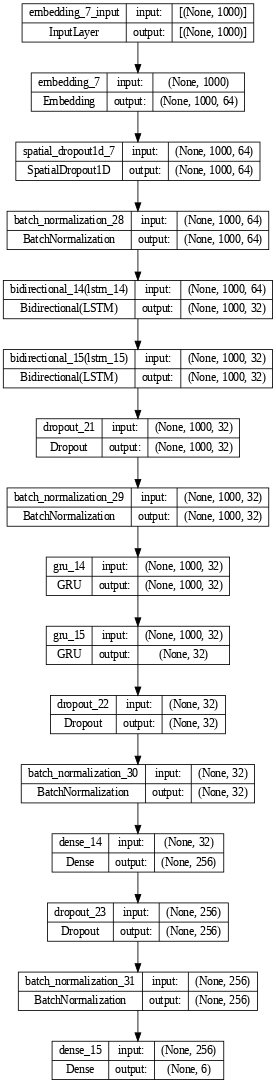

Epoch 1/25
69/69 [==============================] - 32s 301ms/step - loss: 1.6631 - accuracy: 0.3672 - val_loss: 1.7846 - val_accuracy: 0.2929
Epoch 2/25
69/69 [==============================] - 18s 264ms/step - loss: 0.9372 - accuracy: 0.6578 - val_loss: 2.2659 - val_accuracy: 0.2929
Epoch 3/25
69/69 [==============================] - 18s 261ms/step - loss: 0.6137 - accuracy: 0.7838 - val_loss: 2.2301 - val_accuracy: 0.2309
Epoch 4/25
69/69 [==============================] - 18s 261ms/step - loss: 0.3723 - accuracy: 0.8770 - val_loss: 2.5488 - val_accuracy: 0.1997
Epoch 5/25
69/69 [==============================] - 17s 251ms/step - loss: 0.2051 - accuracy: 0.9353 - val_loss: 3.2797 - val_accuracy: 0.2903
Epoch 6/25
69/69 [==============================] - 20s 284ms/step - loss: 0.1354 - accuracy: 0.9570 - val_loss: 2.4966 - val_accuracy: 0.4192
Epoch 7/25
69/69 [==============================] - 18s 260ms/step - loss: 0.0631 - accuracy: 0.9800 - val_loss: 2.0087 - val_accuracy: 0.5145

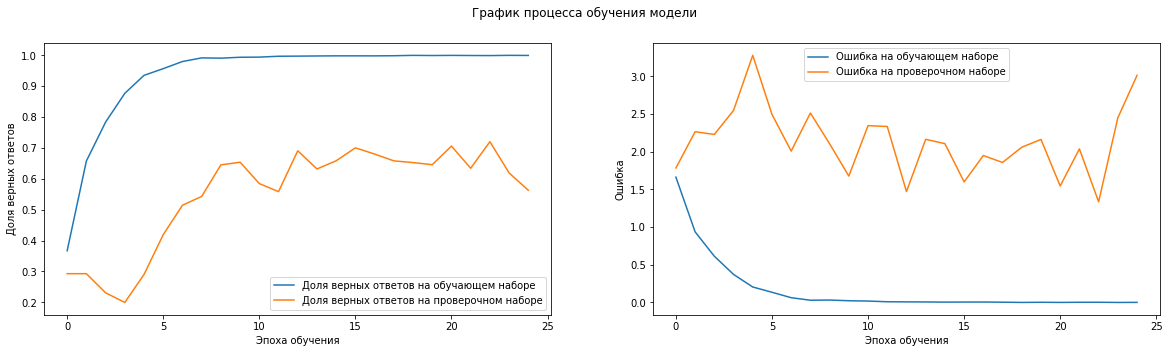

209/209 [==============================] - 21s 92ms/step

 Нейросеть: SIZE(5000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков              39% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: Стругацкие            64% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: О. Генри              47% сеть отнесла к классу О. Генри             - ВЕРНО
Класс: Клиффорд_Саймак       50% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО
Класс: Рэй Брэдберри         67% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО
Класс: Макс Фрай             98% сеть отнесла к классу Макс Фрай            - ВЕРНО

 Средняя точность распознавания:  50% 

(17640, 1000) (17640, 6)
(6686, 1000) (6686, 6)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 1000, 64)          640000    
                                               

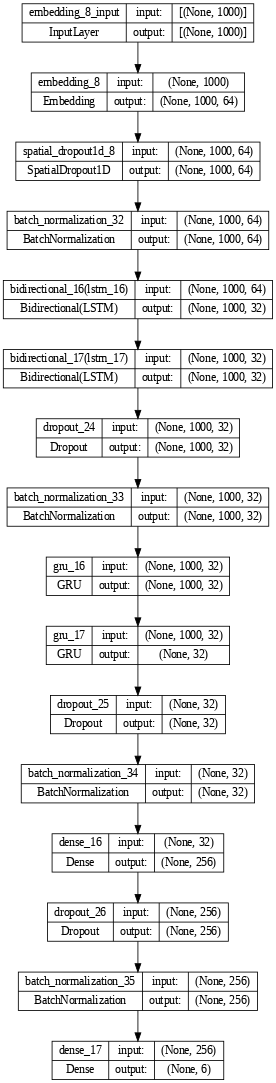

Epoch 1/25
69/69 [==============================] - 34s 310ms/step - loss: 1.6846 - accuracy: 0.3546 - val_loss: 1.7482 - val_accuracy: 0.2929
Epoch 2/25
69/69 [==============================] - 19s 277ms/step - loss: 0.9512 - accuracy: 0.6363 - val_loss: 1.8185 - val_accuracy: 0.3065
Epoch 3/25
69/69 [==============================] - 19s 283ms/step - loss: 0.5690 - accuracy: 0.7954 - val_loss: 2.2148 - val_accuracy: 0.2940
Epoch 4/25
69/69 [==============================] - 19s 271ms/step - loss: 0.2744 - accuracy: 0.9141 - val_loss: 2.8462 - val_accuracy: 0.3190
Epoch 5/25
69/69 [==============================] - 19s 283ms/step - loss: 0.0921 - accuracy: 0.9742 - val_loss: 1.7447 - val_accuracy: 0.4946
Epoch 6/25
69/69 [==============================] - 19s 270ms/step - loss: 0.0355 - accuracy: 0.9905 - val_loss: 3.0528 - val_accuracy: 0.3711
Epoch 7/25
69/69 [==============================] - 19s 281ms/step - loss: 0.0132 - accuracy: 0.9971 - val_loss: 3.5492 - val_accuracy: 0.4179

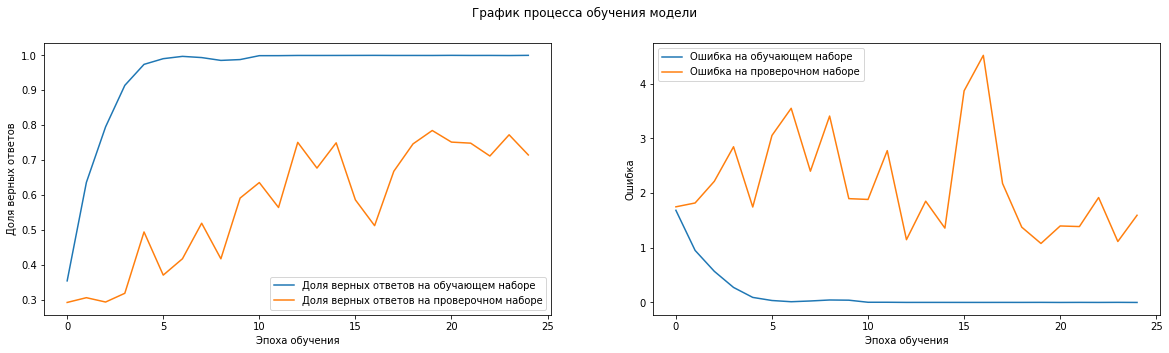

209/209 [==============================] - 22s 92ms/step

 Нейросеть: SIZE(10000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков              65% сеть отнесла к классу Булгаков             - ВЕРНО
Класс: Стругацкие            45% сеть отнесла к классу Стругацкие           - ВЕРНО
Класс: О. Генри              99% сеть отнесла к классу О. Генри             - ВЕРНО
Класс: Клиффорд_Саймак       61% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО
Класс: Рэй Брэдберри         65% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО
Класс: Макс Фрай             90% сеть отнесла к классу Макс Фрай            - ВЕРНО

 Средняя точность распознавания:  71% 

(17640, 1000) (17640, 6)
(6686, 1000) (6686, 6)


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 1000, 64)          2560000   
                                                  

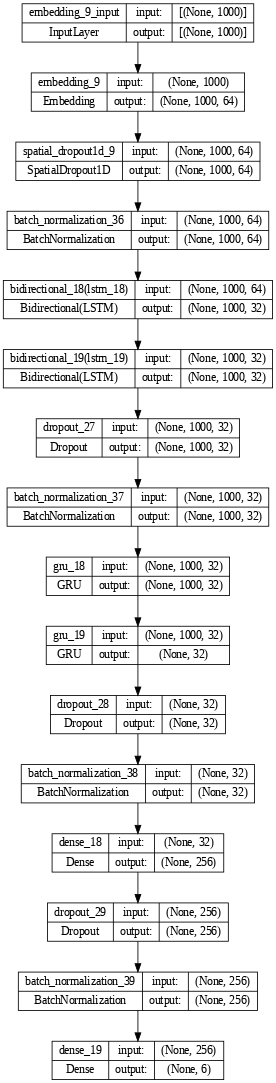

Epoch 1/25
69/69 [==============================] - 34s 324ms/step - loss: 1.6739 - accuracy: 0.3625 - val_loss: 1.7738 - val_accuracy: 0.2929
Epoch 2/25
69/69 [==============================] - 19s 274ms/step - loss: 0.8434 - accuracy: 0.6898 - val_loss: 1.9225 - val_accuracy: 0.1264
Epoch 3/25
69/69 [==============================] - 19s 282ms/step - loss: 0.3555 - accuracy: 0.8779 - val_loss: 2.6179 - val_accuracy: 0.1968
Epoch 4/25
69/69 [==============================] - 19s 271ms/step - loss: 0.1537 - accuracy: 0.9541 - val_loss: 2.4912 - val_accuracy: 0.3687
Epoch 5/25
69/69 [==============================] - 19s 283ms/step - loss: 0.0585 - accuracy: 0.9838 - val_loss: 2.6118 - val_accuracy: 0.4910
Epoch 6/25
69/69 [==============================] - 20s 286ms/step - loss: 0.0188 - accuracy: 0.9947 - val_loss: 3.2388 - val_accuracy: 0.4834
Epoch 7/25
69/69 [==============================] - 19s 282ms/step - loss: 0.0428 - accuracy: 0.9893 - val_loss: 3.0175 - val_accuracy: 0.4623

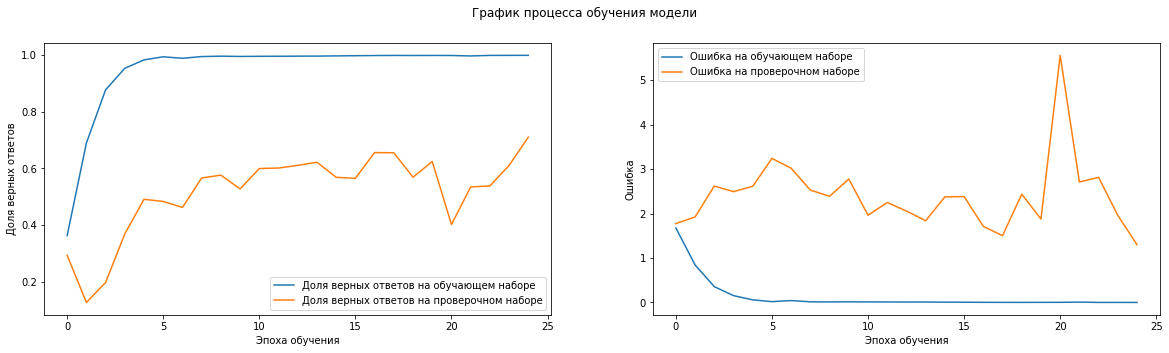

209/209 [==============================] - 22s 92ms/step

 Нейросеть: SIZE(40000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков              61% сеть отнесла к классу Булгаков             - ВЕРНО
Класс: Стругацкие            56% сеть отнесла к классу Стругацкие           - ВЕРНО
Класс: О. Генри              72% сеть отнесла к классу О. Генри             - ВЕРНО
Класс: Клиффорд_Саймак       98% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО
Класс: Рэй Брэдберри         83% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО
Класс: Макс Фрай             70% сеть отнесла к классу Макс Фрай            - ВЕРНО

 Средняя точность распознавания:  74% 



,SIZE(5000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256),SIZE(10000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256),SIZE(40000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
0,50.466667,70.833333,73.533333


In [21]:
VOCAB_SIZE = [5000, 10000, 40000]
tableRez = pd.DataFrame()
WIN_SIZE = 1000
WIN_HOP = 100
EmbLv = 64 # Embedding слой
BlstmLv = 16 # Двунаправленные рекуррентные слои LSTM
GruLv = 32 # Рекуррентные слои GRU
DnsLv = 256 # Полносвязный слой

for vSize in VOCAB_SIZE:
    x_train, y_train, x_test, y_test = tokenz(vSize, 1000, 100)

    mod = Sequential()
    mod.add(Embedding(vSize, EmbLv, input_length=WIN_SIZE))
    mod.add(SpatialDropout1D(0.1))
    mod.add(BatchNormalization())
    # Двунаправленные рекуррентные слои LSTM
    mod.add(Bidirectional(LSTM(BlstmLv, return_sequences=True)))
    mod.add(Bidirectional(LSTM(BlstmLv, return_sequences=True)))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    # Рекуррентные слои GRU
    mod.add(GRU(GruLv, return_sequences=True, reset_after=True))
    mod.add(GRU(GruLv, reset_after=True))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    # Полносвязный слой
    mod.add(Dense(DnsLv, activation='relu'))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    mod.add(Dense(CLASS_COUNT, activation='softmax'))

    hist = compile_train_eval_model(mod, x_train, y_train, x_test, y_test, optimizer='rmsprop',
                            epochs=25, batch_size=256, class_labels=CLASS_LIST,
                            title=f'SIZE({vSize}) Embedding({EmbLv}) + BLSTM({BlstmLv})x2 + GRU({GruLv})x2 + Dense({DnsLv})')

    tableRez[hist.index[0]] = [hist[0]]
tableRez


4. Поменяйте длину отрезка текста и шаг окна разбиения текста на векторы (WIN_SIZE, WIN_HOP) используя значения (500,50) и (2000,200). Пересоздайте датасеты, при этом оставьте VOCAB_SIZE=20000. Обучите выбранную нейронку на этих датасетах. Сделайте выводы об изменении точности распознавания авторов текстов.
Результаты всей работы сведите в таблицу.

(887, 500) (887, 6)
(340, 500) (340, 6)


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 500, 64)           1280000   
                                                                 
 spatial_dropout1d_14 (Spati  (None, 500, 64)          0         
 alDropout1D)                                                    
                                                                 
 batch_normalization_56 (Bat  (None, 500, 64)          256       
 chNormalization)                                                
                                                                 
 bidirectional_28 (Bidirecti  (None, 500, 32)          10368     
 onal)                                                           
                                                                 
 bidirectional_29 (Bidirecti  (None, 500, 32)          6272      
 onal)     

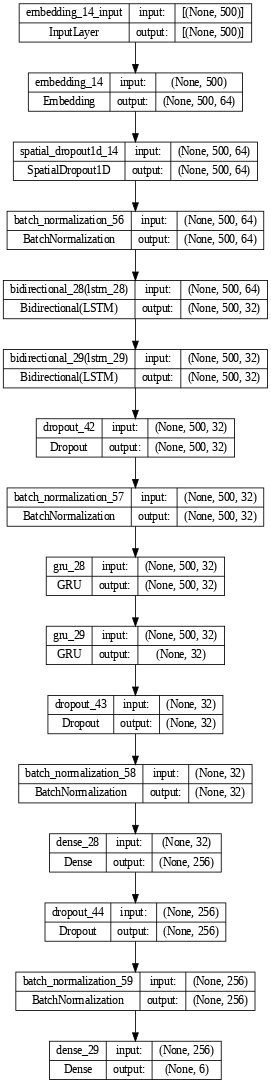

Epoch 1/25
4/4 [==============================] - 14s 981ms/step - loss: 2.3137 - accuracy: 0.1590 - val_loss: 1.7722 - val_accuracy: 0.2912
Epoch 2/25
4/4 [==============================] - 1s 171ms/step - loss: 1.6247 - accuracy: 0.3540 - val_loss: 1.7668 - val_accuracy: 0.2912
Epoch 3/25
4/4 [==============================] - 1s 179ms/step - loss: 1.3093 - accuracy: 0.5085 - val_loss: 1.7630 - val_accuracy: 0.2912
Epoch 4/25
4/4 [==============================] - 1s 230ms/step - loss: 1.0148 - accuracy: 0.6268 - val_loss: 1.7608 - val_accuracy: 0.2912
Epoch 5/25
4/4 [==============================] - 1s 230ms/step - loss: 0.7744 - accuracy: 0.7272 - val_loss: 1.7599 - val_accuracy: 0.2912
Epoch 6/25
4/4 [==============================] - 1s 186ms/step - loss: 0.6039 - accuracy: 0.8117 - val_loss: 1.7625 - val_accuracy: 0.2912
Epoch 7/25
4/4 [==============================] - 1s 162ms/step - loss: 0.4488 - accuracy: 0.8489 - val_loss: 1.7618 - val_accuracy: 0.2912
Epoch 8/25
4/4 [===

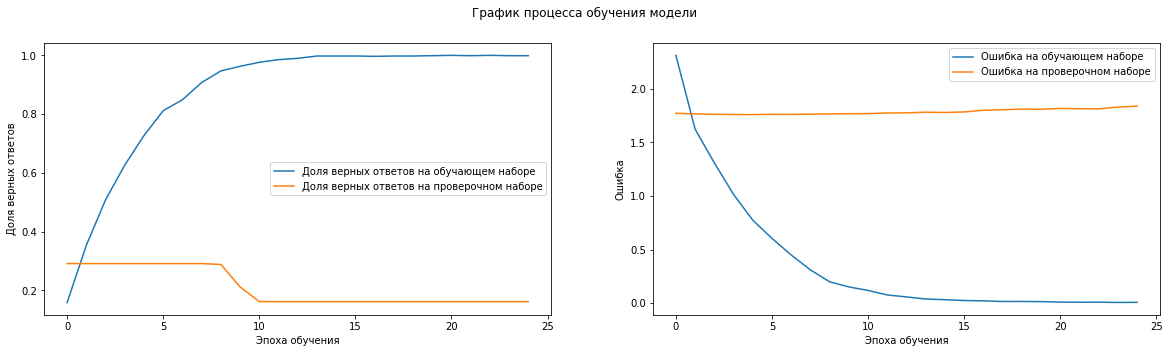

11/11 [==============================] - 3s 51ms/step

 Нейросеть: WSIZE(500) WHOPE(2000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков             100% сеть отнесла к классу Стругацкие           - НЕВЕРНО
Класс: Стругацкие           100% сеть отнесла к классу Стругацкие           - ВЕРНО
Класс: О. Генри             100% сеть отнесла к классу Стругацкие           - НЕВЕРНО
Класс: Клиффорд_Саймак      100% сеть отнесла к классу Стругацкие           - НЕВЕРНО
Класс: Рэй Брэдберри        100% сеть отнесла к классу Стругацкие           - НЕВЕРНО
Класс: Макс Фрай            100% сеть отнесла к классу Стругацкие           - НЕВЕРНО

 Средняя точность распознавания:  17% 

(8836, 500) (8836, 6)
(3360, 500) (3360, 6)


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_15 (Embedding)    (None, 500, 64)           1280000   
                                   

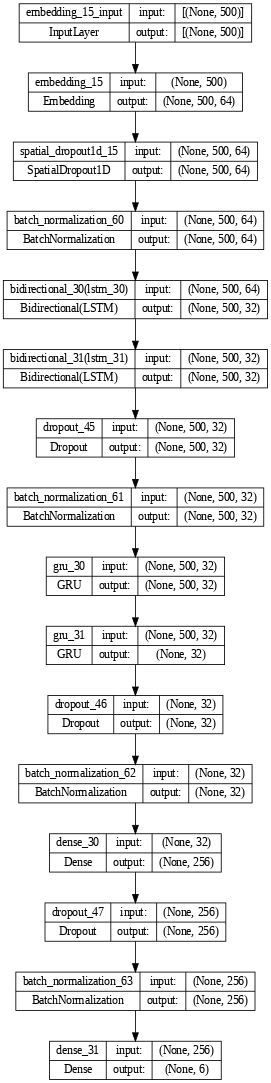

Epoch 1/25
35/35 [==============================] - 20s 215ms/step - loss: 1.8411 - accuracy: 0.3029 - val_loss: 1.7426 - val_accuracy: 0.2923
Epoch 2/25
35/35 [==============================] - 6s 169ms/step - loss: 1.2783 - accuracy: 0.5157 - val_loss: 1.7714 - val_accuracy: 0.3021
Epoch 3/25
35/35 [==============================] - 5s 148ms/step - loss: 0.8400 - accuracy: 0.6799 - val_loss: 1.7648 - val_accuracy: 0.3503
Epoch 4/25
35/35 [==============================] - 6s 164ms/step - loss: 0.5145 - accuracy: 0.8092 - val_loss: 1.7727 - val_accuracy: 0.3217
Epoch 5/25
35/35 [==============================] - 5s 154ms/step - loss: 0.2835 - accuracy: 0.8988 - val_loss: 1.9938 - val_accuracy: 0.3000
Epoch 6/25
35/35 [==============================] - 5s 146ms/step - loss: 0.1573 - accuracy: 0.9470 - val_loss: 2.9533 - val_accuracy: 0.3077
Epoch 7/25
35/35 [==============================] - 6s 168ms/step - loss: 0.0843 - accuracy: 0.9756 - val_loss: 1.9085 - val_accuracy: 0.3161
Epoch

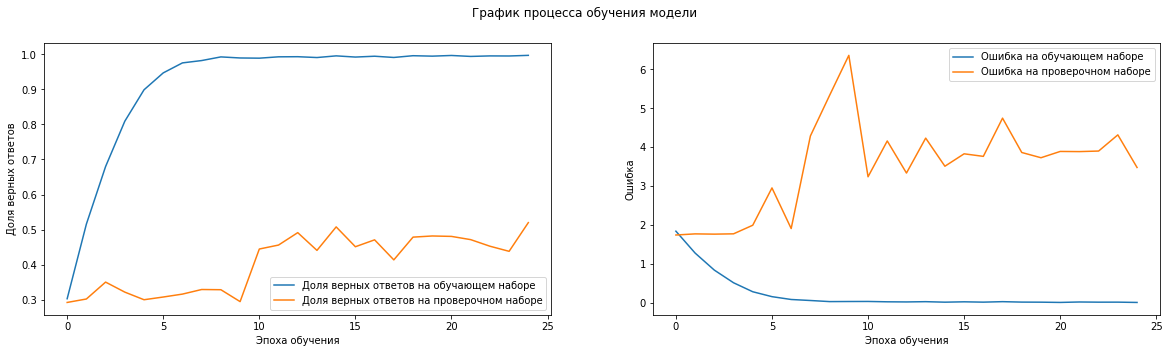

105/105 [==============================] - 7s 49ms/step

 Нейросеть: WSIZE(500) WHOPE(200) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков              54% сеть отнесла к классу Булгаков             - ВЕРНО
Класс: Стругацкие            56% сеть отнесла к классу Стругацкие           - ВЕРНО
Класс: О. Генри              35% сеть отнесла к классу О. Генри             - ВЕРНО
Класс: Клиффорд_Саймак       32% сеть отнесла к классу Стругацкие           - НЕВЕРНО
Класс: Рэй Брэдберри         48% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО
Класс: Макс Фрай             66% сеть отнесла к классу Макс Фрай            - ВЕРНО

 Средняя точность распознавания:  45% 

(888, 50) (888, 6)
(341, 50) (341, 6)


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, 50, 64)            1280000   
                                                

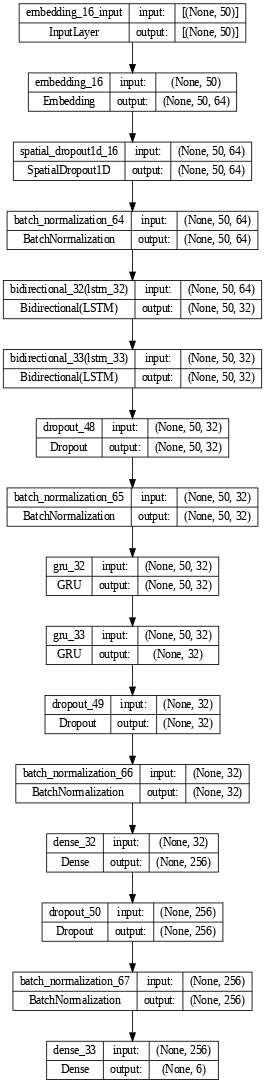

Epoch 1/25
4/4 [==============================] - 14s 780ms/step - loss: 2.2564 - accuracy: 0.1700 - val_loss: 1.7711 - val_accuracy: 0.2903
Epoch 2/25
4/4 [==============================] - 0s 52ms/step - loss: 1.6595 - accuracy: 0.3345 - val_loss: 1.7606 - val_accuracy: 0.2903
Epoch 3/25
4/4 [==============================] - 0s 47ms/step - loss: 1.3283 - accuracy: 0.5056 - val_loss: 1.7527 - val_accuracy: 0.2903
Epoch 4/25
4/4 [==============================] - 0s 50ms/step - loss: 1.0159 - accuracy: 0.6475 - val_loss: 1.7446 - val_accuracy: 0.2903
Epoch 5/25
4/4 [==============================] - 0s 49ms/step - loss: 0.7750 - accuracy: 0.7309 - val_loss: 1.7424 - val_accuracy: 0.2903
Epoch 6/25
4/4 [==============================] - 0s 50ms/step - loss: 0.5757 - accuracy: 0.8176 - val_loss: 1.7391 - val_accuracy: 0.2903
Epoch 7/25
4/4 [==============================] - 0s 52ms/step - loss: 0.4269 - accuracy: 0.8818 - val_loss: 1.7364 - val_accuracy: 0.2903
Epoch 8/25
4/4 [=========

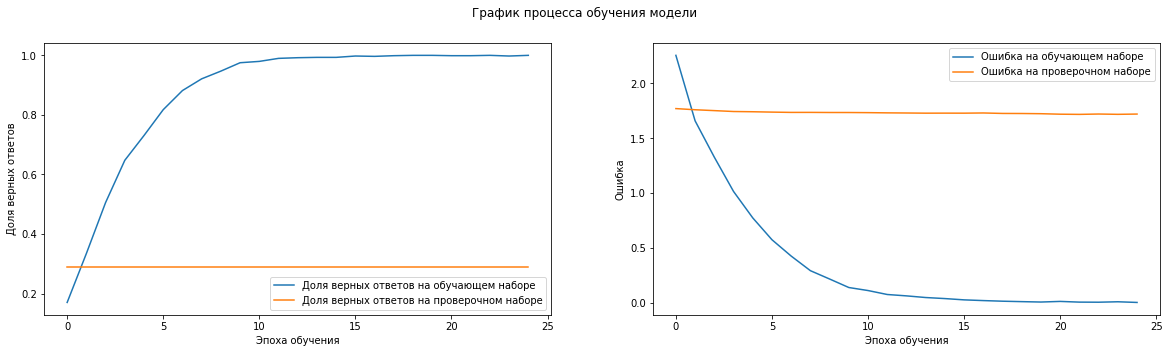

11/11 [==============================] - 2s 11ms/step

 Нейросеть: WSIZE(50) WHOPE(2000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков             100% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: Стругацкие           100% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: О. Генри             100% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: Клиффорд_Саймак      100% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: Рэй Брэдберри        100% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: Макс Фрай            100% сеть отнесла к классу Макс Фрай            - ВЕРНО

 Средняя точность распознавания:  17% 

(8850, 50) (8850, 6)
(3372, 50) (3372, 6)


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, 50, 64)            1280000   
                                      

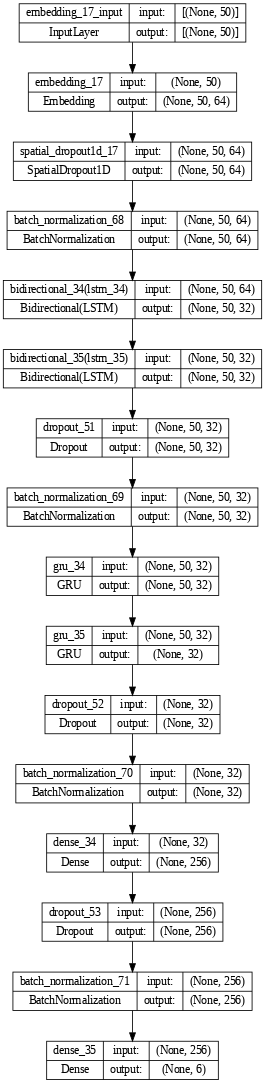

Epoch 1/25
35/35 [==============================] - 16s 103ms/step - loss: 1.8645 - accuracy: 0.2820 - val_loss: 1.7373 - val_accuracy: 0.2918
Epoch 2/25
35/35 [==============================] - 1s 40ms/step - loss: 1.3805 - accuracy: 0.4716 - val_loss: 1.7661 - val_accuracy: 0.2918
Epoch 3/25
35/35 [==============================] - 1s 38ms/step - loss: 0.9510 - accuracy: 0.6380 - val_loss: 1.8332 - val_accuracy: 0.1670
Epoch 4/25
35/35 [==============================] - 1s 39ms/step - loss: 0.5887 - accuracy: 0.7915 - val_loss: 1.8556 - val_accuracy: 0.2960
Epoch 5/25
35/35 [==============================] - 2s 46ms/step - loss: 0.3298 - accuracy: 0.8827 - val_loss: 1.9823 - val_accuracy: 0.2918
Epoch 6/25
35/35 [==============================] - 2s 48ms/step - loss: 0.1754 - accuracy: 0.9438 - val_loss: 2.2814 - val_accuracy: 0.2924
Epoch 7/25
35/35 [==============================] - 1s 38ms/step - loss: 0.1041 - accuracy: 0.9664 - val_loss: 2.4296 - val_accuracy: 0.2998
Epoch 8/25


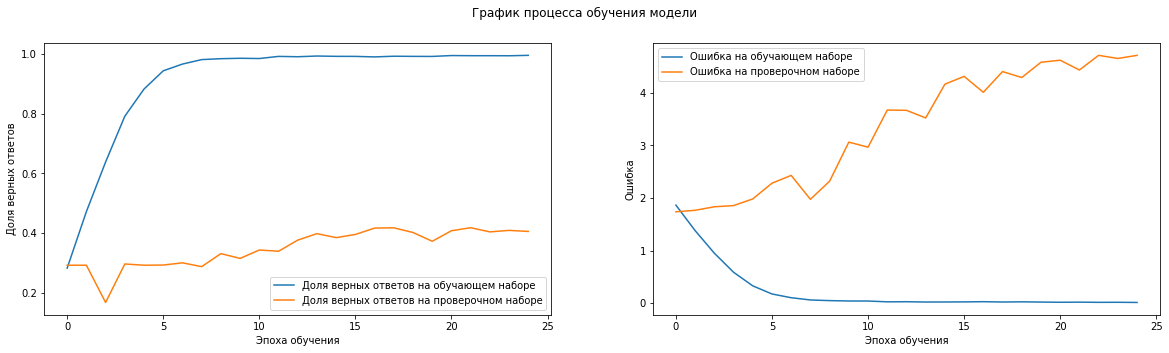

106/106 [==============================] - 3s 11ms/step

 Нейросеть: WSIZE(50) WHOPE(200) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
Класс: Булгаков              26% сеть отнесла к классу Булгаков             - ВЕРНО
Класс: Стругацкие            25% сеть отнесла к классу Макс Фрай            - НЕВЕРНО
Класс: О. Генри              37% сеть отнесла к классу О. Генри             - ВЕРНО
Класс: Клиффорд_Саймак       25% сеть отнесла к классу Клиффорд_Саймак      - ВЕРНО
Класс: Рэй Брэдберри         35% сеть отнесла к классу Рэй Брэдберри        - ВЕРНО
Класс: Макс Фрай             68% сеть отнесла к классу Макс Фрай            - ВЕРНО

 Средняя точность распознавания:  36% 



,WSIZE(500) WHOPE(2000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256),WSIZE(500) WHOPE(200) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256),WSIZE(50) WHOPE(2000) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256),WSIZE(50) WHOPE(200) Embedding(64) + BLSTM(16)x2 + GRU(32)x2 + Dense(256)
0,16.666667,45.383333,16.666667,35.866667


In [27]:
VOCAB_SIZE = 20000
tableRez = pd.DataFrame()
WIN_SIZE = [500,50]
WIN_HOP = [2000,200]
EmbLv = 64 # Embedding слой
BlstmLv = 16 # Двунаправленные рекуррентные слои LSTM
GruLv = 32 # Рекуррентные слои GRU
DnsLv = 256 # Полносвязный слой

for wSize in WIN_SIZE:
  for wHope in WIN_HOP:
    x_train, y_train, x_test, y_test = tokenz(VOCAB_SIZE, wSize, wHope)

    mod = Sequential()
    mod.add(Embedding(VOCAB_SIZE, EmbLv, input_length=wSize))
    mod.add(SpatialDropout1D(0.1))
    mod.add(BatchNormalization())
    # Двунаправленные рекуррентные слои LSTM
    mod.add(Bidirectional(LSTM(BlstmLv, return_sequences=True)))
    mod.add(Bidirectional(LSTM(BlstmLv, return_sequences=True)))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    # Рекуррентные слои GRU
    mod.add(GRU(GruLv, return_sequences=True, reset_after=True))
    mod.add(GRU(GruLv, reset_after=True))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    # Полносвязный слой
    mod.add(Dense(DnsLv, activation='relu'))
    mod.add(Dropout(0.1))
    mod.add(BatchNormalization())
    mod.add(Dense(CLASS_COUNT, activation='softmax'))

    hist = compile_train_eval_model(mod, x_train, y_train, x_test, y_test, optimizer='rmsprop',
                            epochs=25, batch_size=256, class_labels=CLASS_LIST,
                            title=f'WSIZE({wSize}) WHOPE({wHope}) Embedding({EmbLv}) + BLSTM({BlstmLv})x2 + GRU({GruLv})x2 + Dense({DnsLv})')

    tableRez[hist.index[0]] = [hist[0]]
tableRez

Вывод: успешность обучения НС в большей степени зависит от величины выборки, нежели от WSIZE WHOPE